# Basic Digits Classification

### Import TensorFlow

In TensorFlow 0.12+ you can control logging via the environmental variable called TF_CPP_MIN_LOG_LEVEL; it defaults to 0 (all logs shown) but can be set to one of the following values under the Level column.
  
  Level | Level for Humans | Level Description                  
 -------|------------------|------------------------------------ 
  0     | INFO             | [Default] Print all messages       
  1     | WARNING          | Filter out INFO messages           
  2     | ERROR            | Filter out INFO & WARNING messages 
  3     | NONE             | Filter out all messages   

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'  # or any {'0', '1', '2'}
import tensorflow as tf

print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.18.0


# The Dataset
### Import MNIST

In [3]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) =mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


### Shapes of Imported Arrays

In [4]:
#x_train & x_test are numpy areas
print("x train shape: ", x_train.shape)
print("y train shape: ", y_train.shape)

print("x test shape: ", x_test.shape)
print("y test shape: ", y_test.shape)

# example on how to read x train shape:  (60000, 28, 28) =>
# 60000 => Number of examples in the area
# 28, 28 => each example has 28x28px dimensions
# example on how to read y train shape:  (60000,)
# 6000 => Labels per class

x train shape:  (60000, 28, 28)
y train shape:  (60000,)
x test shape:  (10000, 28, 28)
y test shape:  (10000,)


### Plot an Image Example

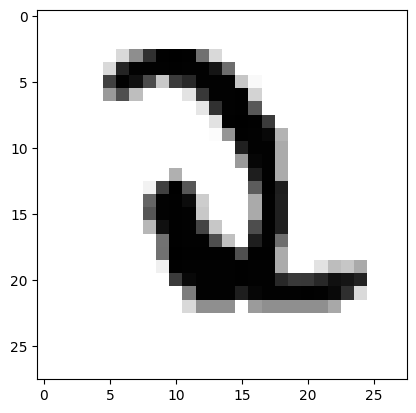

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline 
#ensure that the images are shown in the notebook

plt.imshow(x_train[400], cmap="binary")
plt.show()

### Display Labels

In [7]:
y_train[400]

np.uint8(2)

In [8]:
print(set(y_train)) #writes out the unique values present in the dataset

{np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(7), np.uint8(8), np.uint8(9)}


# One Hot Encoding
After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

### Encoding Labels

In [9]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train) #hot encoding done through tensorflow
y_test_encoded = to_categorical(y_test)

### Validated Shapes

In [10]:
print("y_train_encoded shape: ", y_train_encoded.shape)
print("y_test_encoded shape: ", y_test_encoded.shape)

#y_train_encoded shape:  (60000, 10) => 60000 examples with a 10 dimensional vector
#this allows the neural network to understand which "switch" is on out of the 10 dimensions

y_train_encoded shape:  (60000, 10)
y_test_encoded shape:  (10000, 10)


### Display Encoded Labels

In [11]:
y_train_encoded[400] #=> This used to be 2, in hot encoding is a array with 10 elements, 
# where only number two (so array[3], since we start from 0) is encoded to 1

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

# Neural Networks

### Linear Equations

![Single Neuron](imgs/1_2.png)

The above graph simply represents the equation:

\begin{equation}
y = w1 * x1 + w2 * x2 + w3 * x3 + b
\end{equation}

Where the `w1, w2, w3` are called the **weights** and `b` is an intercept term called **bias**. The equation can also be *vectorised* like this:

\begin{equation}
y = W . X + b
\end{equation}

Where `X = [x1, x2, x3]` and `W = [w1, w2, w3].T`. The .T means *transpose*. This is because we want the dot product to give us the result we want i.e. `w1 * x1 + w2 * x2 + w3 * x3`. This gives us the vectorised version of our linear equation.

A simple, linear approach to solving hand-written image classification problem - could it work?

![Single Neuron with 784 features](imgs/1_3.png)

### Neural Networks

![Neural Network with 2 hidden layers](imgs/1_4.png)

This type of computational graph is a **Neural Network**, they can help solving more complex problems by *cascading the linear functions one after the other*. The only difference from the standard linear equation above is that an **Activation** is *applied to each node in addition to the linear output*.
The **purpose of an Activation function** is to find *non-linear patterns in the data*, which enables the network to learn complex patterns in data.

# Preprocessing the Examples

### Unrolling N-dimensional Arrays to Vectors

In [12]:
# We need to change the arrrays to vectors so that we have the input layer
import numpy as np

x_train_reshaped = np.reshape(x_train, (60000, 784)) 
# 60000 is the number of samples we have in the training model, 784 is the "unrolled" array value from 28 x 28 (width and height of the images)
x_test_reshaped = np.reshape(x_test, (10000, 784))

print("x_train_reshaped: ", x_train_reshaped.shape)
print("x_test_reshaped: ", x_test_reshaped.shape)

x_train_reshaped:  (60000, 784)
x_test_reshaped:  (10000, 784)


### Display Pixel Values

In [13]:
print(set(x_train_reshaped[400])) #All unique pixel values from 0 - 255

{np.uint8(0), np.uint8(130), np.uint8(3), np.uint8(6), np.uint8(140), np.uint8(13), np.uint8(141), np.uint8(143), np.uint8(15), np.uint8(145), np.uint8(146), np.uint8(25), np.uint8(154), np.uint8(28), np.uint8(29), np.uint8(163), np.uint8(37), np.uint8(38), np.uint8(167), np.uint8(168), np.uint8(169), np.uint8(43), np.uint8(176), np.uint8(177), np.uint8(50), np.uint8(178), np.uint8(180), np.uint8(55), np.uint8(56), np.uint8(57), np.uint8(187), np.uint8(191), np.uint8(63), np.uint8(65), np.uint8(66), np.uint8(196), np.uint8(197), np.uint8(198), np.uint8(199), np.uint8(72), np.uint8(75), np.uint8(205), np.uint8(207), np.uint8(79), np.uint8(208), np.uint8(84), np.uint8(85), np.uint8(214), np.uint8(215), np.uint8(87), np.uint8(219), np.uint8(220), np.uint8(222), np.uint8(223), np.uint8(225), np.uint8(100), np.uint8(101), np.uint8(234), np.uint8(106), np.uint8(239), np.uint8(112), np.uint8(113), np.uint8(243), np.uint8(245), np.uint8(246), np.uint8(249), np.uint8(252), np.uint8(253), np.uin

### Data Normalization

Normalization allows the neural network *to learn the weights and biases* more quickly and efficiently. 
The **mean and standard deviation** is calculated to normalize the dataset.

In [14]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped) #std => standard deviation

epsilon = 1e-10 #very small value, it is used to stabilize the small isntabilities that standard deviation can create

x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon) #example of broadcasting, where x_mean is going to be subtracted for each value of x_train_reshaped
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)  
#Standard practice to do postprocessing of the test set with the mean and std of the dataset, to avoid introducing unnecessary biases



### Display Normalized Pixel Values

In [15]:
print(set(x_train_norm[400]))

{np.float64(-0.4240738943910262), np.float64(1.0141800198390718), np.float64(2.210603629906587), np.float64(2.7960875241949457), np.float64(2.8215433456857437), np.float64(1.396017342201045), np.float64(2.3633385588513764), np.float64(2.7833596134495466), np.float64(2.5542572200323628), np.float64(1.4342010744372422), np.float64(2.0069570579802014), np.float64(2.6178967737593584), np.float64(2.070596611707197), np.float64(2.706992148977152), np.float64(2.4015222910875735), np.float64(1.7142151108360224), np.float64(2.668808416740955), np.float64(2.4142502018329726), np.float64(2.083324522452596), np.float64(2.096052433197995), np.float64(2.3760664695967755), np.float64(2.694264238231753), np.float64(0.4923356792777089), np.float64(0.059586713934139515), np.float64(0.8487171801488835), np.float64(1.816038396799215), np.float64(1.8287663075446141), np.float64(0.8614450908942827), np.float64(0.5305194115139061), np.float64(2.1087803439433945), np.float64(2.7451758812133495), np.float64(2.

# Creating a Model in Keras

In Keras, using a **sequential class** and **adding some layers** to it is enough to create a model.
All the nodes of the layers used in this project are called **dense layers**. which means that *all nodes of a layer are connected to all the nodes of the preceeding layer.*

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

'''
What is the code doing
- Instantiate a sequential model
- Pass on a list of layers that we want in the model, in the order we want them in
- In this case => 2 hidden layers with 128 nodes each and 1 output layer with 10 nodes

The more nodes in a model, the more complex functions will the model be able to understand
however, it will require more computation power
'''
model = Sequential([
    Dense(128, activation = "relu", input_shape = (784,)),
    Dense(128, activation = "relu"),
    Dense(10, activation = "softmax")
])


/home/rosix/miniforge3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1740273114.644984    3613 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9517 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9


### Activation Functions

The first step in the node is the linear sum of the inputs:
\begin{equation}
Z = W . X + b
\end{equation}

The second step in the node is the activation function output:

\begin{equation}
A = f(Z)
\end{equation}

Graphical representation of a node where the two operations are performed:

![ReLU](imgs/1_5.png)

### ReLU Activation Function
ReLU stands for **Rectified Linear Unit (ReLU)** and it is a **a piecewise linear function that outputs the input directly if it is positive; otherwise, it outputs zero**.
In simpler terms, ReLU allows positive values to pass through unchanged while setting all negative values to zero. 

The ReLU function can be described mathematically as follows:

\begin{equation}
f(x) = max(0,x)
\end{equation}

Where:

- x is the input to the neuron.
- The function returns x if x is greater than 0.
- If x is less than or equal to 0, the function returns 0.

### Softmax Activation Function
Softmax is an activation function commonly used in neural networks for **multi-classification problems**.
It converts *a vector of raw prediction scores (often called logits) from the neural network into probabilities*. These probabilities are distributed across different classes such that their sum equals 1.
Softmax helps in transforming output values into a format that can be interpreted as probabilities.

\begin{equation}
\ Softmax(z_i) = \frac{e^{z_{i}}}{\sum_{j=1}^K e^{z_{j}}} \ \
\end{equation}

Where:
- $z_i$ is the logit (the output of the previous layer in the network) for the $i^{th}$ class.
- $K$ is the number of classes
- $e^{z_{i}}$ represents the exponential of the logit
- $\sum_{j=1}^K e^{z_{j}}$  is the sum of exponentials across all classes.



### Compiling the Model

In addition to defining the architecture of the model, optimizing the weights and biases is a necessary step to ensure accuracy.
To do that, the model needs to be compiled, the operation requires:
- The **optimization algorythm**
- The **loss function**
- The **metrics**, in this case accuracy 

In [17]:
model.compile(
    optimizer = "sgd", #stochaistic gradiant descent, minizes the loss function
    loss = "categorical_crossentropy", #function to be minimized
    metrics = ["accuracy"]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

# Task 7: Training the Model

### Training the Model

The model will be trained through three epochs.
An epoch in machine learning represents one complete pass through the entire training dataset. It ensures that every data sample is used to update the model’s parameters, optimizing performance over multiple epochs.

In [18]:
model.fit(x_train_norm, y_train_encoded, epochs = 3) #going through the examples with the labels three times

Epoch 1/3


I0000 00:00:1740273118.783021    3919 service.cc:148] XLA service 0x7fef80015b40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740273118.783081    3919 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 SUPER, Compute Capability 8.9
2025-02-23 01:11:58.791522: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1740273118.813447    3919 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-02-23 01:11:59.130119: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_54', 4 bytes spill stores, 4 bytes spill loads



  91/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3736 - loss: 1.8887

I0000 00:00:1740273119.907767    3919 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8060 - loss: 0.6387
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9430 - loss: 0.2012
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9572 - loss: 0.1450


### Evaluating the Model

This process is to ensure that the machine has actually understood the underlying function and not just memorized all the dataset.

In [19]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded) #Does another pass on the model with the test data and then comapares the loss and accuracy with the ones from the training
print("Test set accuracy: ", accuracy * 100)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9508 - loss: 0.1613
Test set accuracy:  95.8400011062622


# Task 8: Predictions

### Predictions on Test Set

In [20]:
preds = model.predict(x_test_norm)
print("Shape of predictions: ", preds.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Shape of predictions:  (10000, 10)


### Plotting the Results

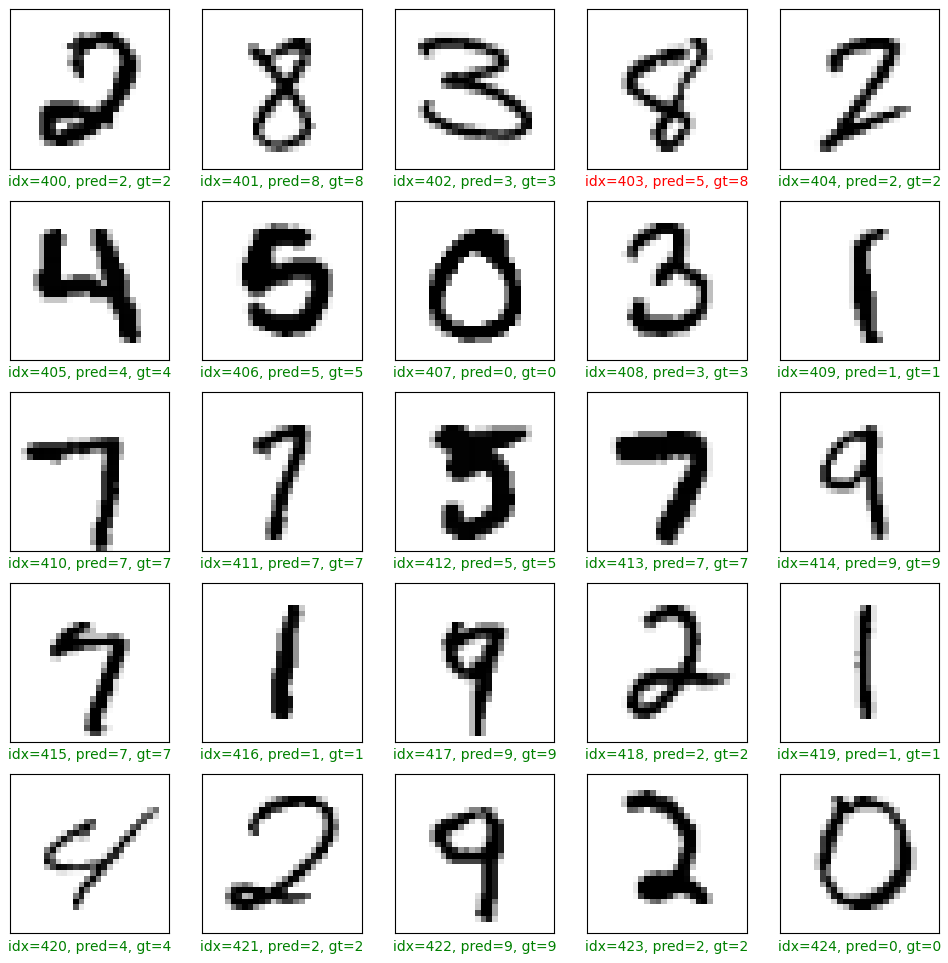

In [23]:
plt.figure(figsize=(12,12))

start_idx = 400

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[start_idx+i])
    groundtruth = y_test[start_idx+i]
    
    col = "g"
    if pred != groundtruth:
        col = "r"
    
    plt.xlabel("idx={}, pred={}, gt={}" .format(start_idx+i, pred, groundtruth), color= col)
    plt.imshow(x_test[start_idx+i], cmap="binary")
plt.show()

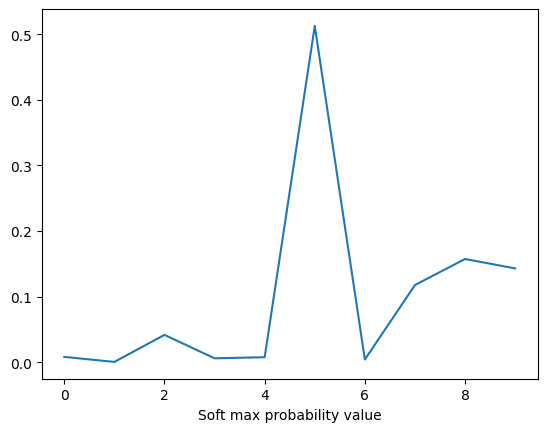

In [24]:
plt.plot(preds[403])
plt.xlabel("Soft max probability value".format())
plt.show() #softmax probability values
